# Image Processing

This Jupyter notebook demonstrates how to import images (RAW and other formats) and do spacial Fourier transforms to obtain and display spacial power spectra.

* Press `shift`-`enter` or `shift`-`return` when the cursor in in a cell or the cell is selected to run the code in the cell.
* Run the code cells in order for this demonstration.
* Remember that the order in which you run the cells is important, not the order they appear in the notebook.
* Use this code as an example. Change the files and parameters to fit your needs.

The cell below allows this notebook to connect to your Google Drive. There will be popups for you to connect your account and give it permission.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd 'gdrive/MyDrive/SVImageProcessing'

## Install Modules into Colab

Install `rawpy` and update `numpy` and `matplotlib` to versions compatible with `rawpy`.

In [ ]:
%pip install rawpy numpy>=2.0.0 matplotlib>=3.8.4

## Import Modules

The cell below to import the numerical and graphing modules and to configure the graphics interface.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

The next cell loads image modules.

In [3]:
import rawpy
import PIL

## Importing RAW Images

The cell below imports the RAW file named `'APC_0005.dng'` into a variable named `rgb`.

In [4]:
raw = rawpy.imread('APC_0005.dng')
rgb = raw.postprocess(use_camera_wb=True)
rgb16 = raw.postprocess(use_camera_wb=True, output_bps=16)
raw.close()

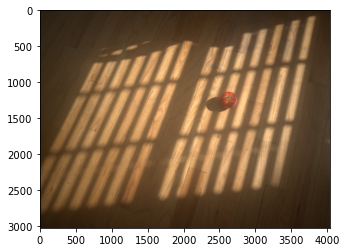

In [5]:
plt.imshow(rgb)

In [8]:
rgb16.max()

65535

In [20]:
f32 = np.float32(rgb16)/2**16

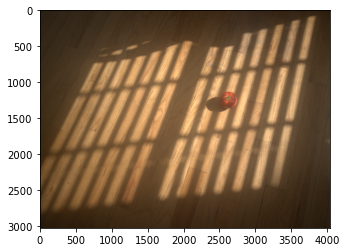

In [21]:
plt.imshow(f32)

In [25]:
gs32 = np.int32(rgb16[:,:,0]) + np.int32(rgb16[:,:,1]) + np.int32(rgb16[:,:,2])

In [28]:
gs32 = gs32[::-1]

In [29]:
gs32.shape

(3024, 4032)

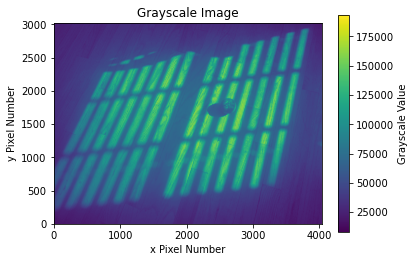

In [44]:
fig, ax = plt.subplots()
cax = ax.imshow(gs32, origin='lower')
ax.set_xlabel('x Pixel Number')
ax.set_ylabel('y Pixel Number')
ax.set_title('Grayscale Image')
fig.colorbar(cax, label='Grayscale Value');

In [27]:
gs32.max()

193566

In [35]:
nmax=gs32.argmax()

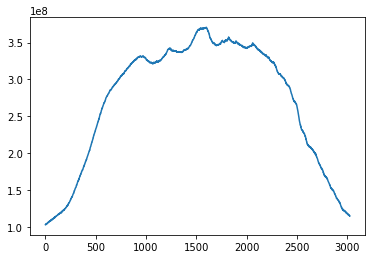

In [59]:
plt.plot(gs32.sum(axis=1))

In [57]:
nymax = gs32.sum(axis=1).argmax()
nymax

1597

Text(0.5, 1.0, 'y Pixel Number: 1597')

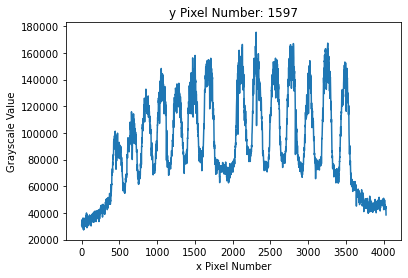

In [61]:
fig, ax = plt.subplots()
plt.plot(gs32[nymax,:])
ax.set_xlabel('x Pixel Number')
ax.set_ylabel('Grayscale Value')
ax.set_title('y Pixel Number: ' + str(nymax))

In [64]:
gs32[nymax, 400:500]

array([ 68763,  68205,  68691,  69826,  68257,  70155,  72781,  73183,
        70072,  70481,  75677,  78081,  76542,  75924,  80983,  82803,
        82169,  80035,  80194,  83903,  83895,  83077,  83693,  91413,
        93650,  93647,  95156,  94444,  94011,  91540,  89881,  88604,
        87982,  90738,  97806,  97113,  93438,  95383,  92711,  90947,
        91281,  88431,  93038,  97044, 101302,  99853,  97188,  95219,
        94532,  95746,  90985,  83848,  81477,  81769,  72776,  72750,
        84859,  88806,  91005,  83514,  82179,  82116,  82668,  79097,
        81490,  86148,  93091,  95974,  98372,  97725,  90448,  88132,
        93118,  97201,  98352,  99810,  97288,  96841,  93251,  88917,
        84692,  85006,  86686,  92339,  91540,  87415,  87494,  81262,
        81534,  82018,  89301,  91433,  85624,  86040,  88640,  88767,
        92925,  87646,  81367,  90116], dtype=int32)

In [45]:
gs32.shape

(3024, 4032)

## Importing JPEG and Other Images

We use a different function to import JPEG, PNG, TIFF, or other images.

In [ ]:
im = PIL.Image.open('TigerLilly.jpg')
xmin, ymin, xmax, ymax = im.getbbox()
imdata_rgb = np.array(im.getdata()).reshape(ymax-ymin, xmax-xmin, 3)
im.close()

In [ ]:
plt.imshow(imdata_rgb)

## Image Calculations

Now we are going to do some calculations with the the imported RAW image, which is stored in the variable `rgb`.

The cell below gives the shape of `rgb`. The first index is the y size. The second is the x size. The third is the number of color channels (3 for red, green, and blue).

In [ ]:
rgb.shape

The cell below stores the size of the x and y dimensions into variables (with shorter names) so we can use them later.

In [ ]:
Nx = rgb.shape[1]
Ny = rgb.shape[0]

Notice in the RAW section above, the origin of the image by default is in the upper left corner. This if different than our regular convention for the y values to increase in the upward direction. For convenience, we will create a new variable with the y-index reversed so the origin is in the lower left corner and the y-values increase in the upward direction. Note that this step is not necessary. All out subsequent calculations will work otherwise, but we want the coordinate system to make sense.

The cell below creates a new variable `pic` with the y-index reversed.

In [ ]:
pic = rgb[::-1,:]

The cell below displays `pic` with the origin in the lower left corner. Notice the y values are now in the standard order.

In [ ]:
plt.imshow(pic, origin='lower')

### Red Channel

The cell below plots the red channel of `pic`. The red channel is the first component in the last (color) dimension of `pic`. Remember tht in Python the first componnt of an array or list is number 0. We use a red color scale in the image below to represent the red channel.

In [ ]:
plt.imshow(pic[:,:,0], cmap='Reds', origin='lower')

Now we take a 2-D Fourier teansform (transform in both the x and y directions) of the red channel.

In [ ]:
red_fft = np.fft.fft2(pic[:,:,0])

The cell below calculates the frequency values in the Fourier transform we just did. (We will use these same frequency values for the green and blue channels as well.) Since this is a spacial Fourier transform (the data is a function of position, not time), the frequncy values are called *wavenumbers*.

In [ ]:
xfreqs = np.fft.fftfreq(Nx)
yfreqs = np.fft.fftfreq(Ny)

The two cells below calculate the minimum and maximum power spectrum values for the signal. We take the logarithm of the power spectrum to compress the scale, much like we did for sound.

In [ ]:
np.min(20*np.log10(np.abs(red_fft)))

In [ ]:
np.max(20*np.log10(np.abs(red_fft)))

The cell below shows the red channel spacial power spectrum. We use a decibel scale to compress the range of values much like we did with sound data. We use the standard color map (viridis) instead of the red color map because it is better at displaying a differences in values over a large range. We set the minimum and maximum values on the color scale with the `vmin` and `vmax` parameters in the `ax.imshow` command. (Try setting them to different values.) Notice that most of the large values are near the origin.

In [ ]:
fig, ax = plt.subplots(figsize=(10,20))
cax = ax.imshow(20*np.log10(np.abs(red_fft[:Ny//2+1,:Nx//2+1])), origin='lower', 
                extent=(xfreqs[0], -xfreqs[Nx//2], yfreqs[0], -yfreqs[Ny//2]), 
                vmin=60, vmax=140)
ax.set_xlabel('x Wavenumber')
ax.set_ylabel('y Wavenumber')
ax.set_title('Red Channel')
fig.colorbar(cax, shrink=0.4, label='PSD (dB)');

The cell below displays the same image as the previous cell, but it compresses the color scale so the details are visible. Notce the diagonal line of high values in the lower left of the image, which is at the same angle and the light and dark pattern. We are using a higher resolution setting, `dpi=300`, to see more detail.

In [ ]:
fig, ax = plt.subplots(figsize=(10,20), dpi=300)
cax = ax.imshow(20*np.log10(np.abs(red_fft[:Ny//2+1,:Nx//2+1])), origin='lower', 
                extent=(xfreqs[0], -xfreqs[Nx//2], yfreqs[0], -yfreqs[Ny//2]), 
                vmin=60, vmax=100)
ax.set_xlabel('x Wavenumber')
ax.set_ylabel('y Wavenumber')
ax.set_title('Red Channel')
fig.colorbar(cax, shrink=0.4, label='PSD (dB)');

### Green Channel

The cell below displays the green channel with a green color map.

In [ ]:
plt.imshow(pic[:,:,1], cmap='Greens', origin='lower')

The rest of the cells in this section perform the same calculations done for the red channel on the green channel.

In [ ]:
green_fft = np.fft.fft2(pic[:,:,1])

In [ ]:
np.min(20*np.log10(np.abs(green_fft)))

In [ ]:
np.max(20*np.log10(np.abs(green_fft)))

In [ ]:
fig, ax = plt.subplots(figsize=(10,20))
cax = ax.imshow(20*np.log10(np.abs(green_fft[:Ny//2+1,:Nx//2+1])), origin='lower', 
                extent=(xfreqs[0], -xfreqs[Nx//2], yfreqs[0], -yfreqs[Ny//2]), 
                vmin=60, vmax=140)
ax.set_xlabel('x Wavenumber')
ax.set_ylabel('y Wavenumber')
ax.set_title('Green Channel')
fig.colorbar(cax, shrink=0.4, label='PSD (dB)');

In [ ]:
fig, ax = plt.subplots(figsize=(10,20), dpi=300)
cax = ax.imshow(20*np.log10(np.abs(green_fft[:Ny//2+1,:Nx//2+1])), origin='lower', 
                extent=(xfreqs[0], -xfreqs[Nx//2], yfreqs[0], -yfreqs[Ny//2]), 
                vmin=60, vmax=100)
ax.set_xlabel('x Wavenumber')
ax.set_ylabel('y Wavenumber')
ax.set_title('Green Channel')
fig.colorbar(cax, shrink=0.4, label='PSD (dB)')

### Blue Channel

The cell below displays the blue channel with a blue color map.

In [ ]:
plt.imshow(pic[:,:,1], cmap='Blues', origin='lower')

The rest of the cells in this section perform the same calculations done for the red and green channels on the blue channel.

In [ ]:
blue_fft = np.fft.fft2(pic[:,:,2])

In [ ]:
np.min(20*np.log10(np.abs(blue_fft)))

In [ ]:
np.max(20*np.log10(np.abs(blue_fft)))

In [ ]:
fig, ax = plt.subplots(figsize=(10,20))
cax = ax.imshow(20*np.log10(np.abs(blue_fft[:Ny//2+1,:Nx//2+1])), origin='lower', 
                extent=(xfreqs[0], -xfreqs[Nx//2], yfreqs[0], -yfreqs[Ny//2]), 
                vmin=60, vmax=140)
ax.set_xlabel('x Wavenumber')
ax.set_ylabel('y Wavenumber')
ax.set_title('Blue Channel')
fig.colorbar(cax, shrink=0.4, label="log(PSD)");

In [ ]:
fig, ax = plt.subplots(figsize=(10,20), dpi=300)
cax = ax.imshow(20*np.log10(np.abs(blue_fft[:Ny//2+1,:Nx//2+1])), origin='lower', 
                extent=(xfreqs[0], -xfreqs[Nx//2], yfreqs[0], -yfreqs[Ny//2]), 
                vmin=60, vmax=95)
ax.set_xlabel('x Wavenumber')
ax.set_ylabel('y Wavenumber')
ax.set_title('Blue Channel')
fig.colorbar(cax, shrink=0.4, label='PSD (dB)');

## Three Channels Combined (Grayscale)

In [ ]:
pic.shape

In [ ]:
sum_image = np.array([], dtype=np.uint16)
sum_image = np.uint16(pic[:,:,0]) + np.uint16(pic[:,:,1]) + np.uint16(pic[:,:,2])

In [ ]:
sum_image.shape

In [ ]:
fig, ax = plt.subplots()
cax = ax.imshow(sum_image, origin="lower", cmap="gray")
fig.colorbar(cax, shrink=0.4, label='Summed Pixel Value');

In [ ]:
sum_fft = np.fft.fft2(sum_image)

In [ ]:
fig, ax = plt.subplots(figsize=(10,20), dpi=300)
cax = ax.imshow(20*np.log10(np.abs(sum_fft[:Ny//2+1,:Nx//2+1])), origin='lower', 
                extent=(xfreqs[0], -xfreqs[Nx//2], yfreqs[0], -yfreqs[Ny//2]), vmin=90, vmax=120)
ax.set_xlabel('x Wavenumber')
ax.set_ylabel('y Wavenumber')
ax.set_title('All Channels')
fig.colorbar(cax, shrink=0.4, label='PSD (dB)');